## **Pencarian Kombinasi Fitur Terbaik Menggunakan Feature Selection**

In [82]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno
from scipy.stats import chi2_contingency

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Saving Model
import pickle

In [83]:
# Load dataset
df = pd.read_csv('Dataset/hotel_bookings_clean.csv')
display(df.head(), df.tail())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,length_of_stay,stay_category
0,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,0,PRT,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-07-01,4,Commercial Hotel
1,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,0,PRT,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,68.0,0,1,Canceled,2015-04-30,4,Commercial Hotel
2,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,0,PRT,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,76.5,0,2,Canceled,2015-06-23,6,Commercial Hotel
3,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,0,PRT,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-04-02,2,Commercial Hotel
4,City Hotel,1,79,2015,July,27,2,0,3,2,0.0,0,0,PRT,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-06-25,3,Commercial Hotel


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,length_of_stay,stay_category
51715,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,0,BEL,Offline TA/TO,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,Commercial Hotel
51716,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,0,FRA,Online TA,TA/TO,0,0,0,Deluxe,Deluxe,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,Commercial Hotel
51717,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,0,DEU,Online TA,TA/TO,0,0,0,Deluxe,Deluxe,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,Commercial Hotel
51718,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,0,GBR,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,Commercial Hotel
51719,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,2,DEU,Online TA,TA/TO,0,0,0,Standard,Standard,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07,9,Extended Stay Hotel


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51720 entries, 0 to 51719
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           51720 non-null  object 
 1   is_canceled                     51720 non-null  int64  
 2   lead_time                       51720 non-null  int64  
 3   arrival_date_year               51720 non-null  int64  
 4   arrival_date_month              51720 non-null  object 
 5   arrival_date_week_number        51720 non-null  int64  
 6   arrival_date_day_of_month       51720 non-null  int64  
 7   stays_in_weekend_nights         51720 non-null  int64  
 8   stays_in_week_nights            51720 non-null  int64  
 9   adults                          51720 non-null  int64  
 10  children                        51720 non-null  float64
 11  babies                          51720 non-null  int64  
 12  meal                            

## **Data Preprocessing & Feature Engineering**

Setelah sebelumnya sudah dilakukan treatment terhadap missing value, duplikat value dan outliers. pada tahap ini kita akan mempersiapkan dataset untuk dipakai membangun model prediktif

**Pengecekan Korelasi Numerik**

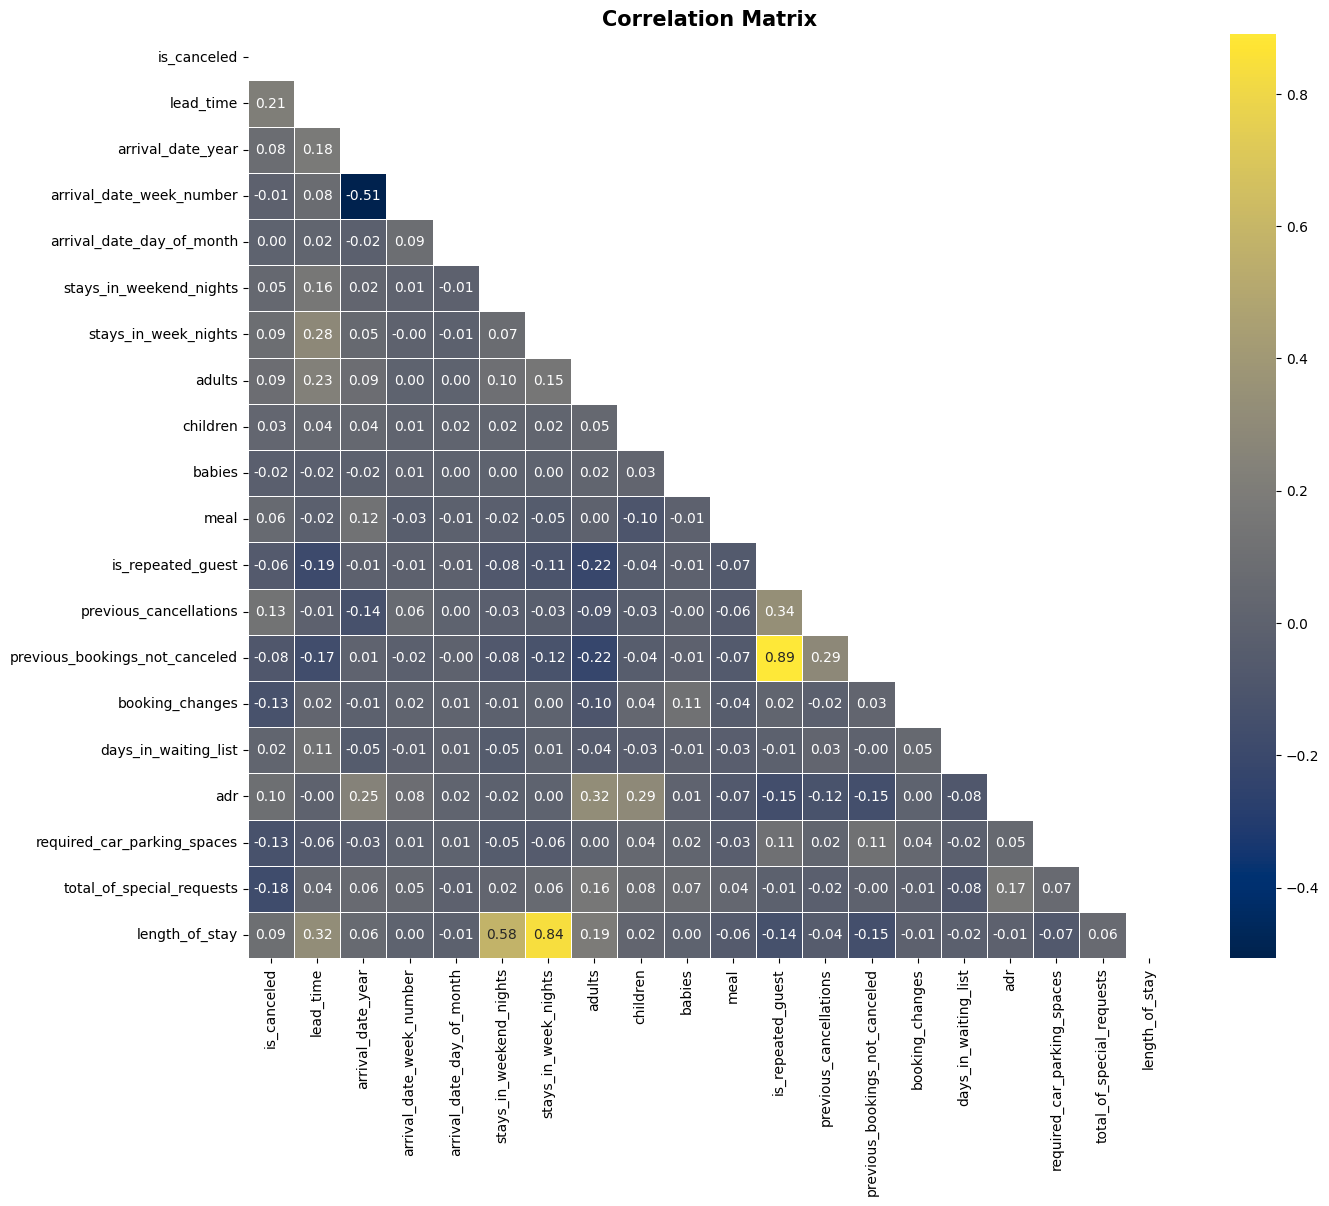

In [85]:
plt.figure(figsize=(15, 12))
corr = df.corr(numeric_only=True, method='spearman')
matriks = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.2f', mask=matriks, cmap='cividis', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Berdasarkan pengecekan korelasi diatas, bisa di simpulkan :
- lead_time memiliki korelasi yang paling tinggi dengan is_canceled dibandingkan fitur lain. Ini berarti semakin lama jeda dari tanggal pemesanan ke tanggal check-in, maka tamu semakin berpotensi untuk membatalkan pemesanan meskipun korelasinya tergolong korelasi lemah (0.21%)
- babies memiliki korelasi yang paling kecil dengan is_canceled dibandingkan fitur lain, bahkan bisa dibilang hampir tidak ada korelasi (0.02%)
- previous_booking_not_canceled memiliki korelasi yang sangat kuat dengan is_repeat_guest (0.87%), hal ini sangat wajar karena tamu yang pernah menginap sebelumnya dan tidak membatalkan reservasi cenderung menjadi tamu berulang (repeat guest)

**Pengecekan Chi Square untuk fitur-fitur kategorikal**

In [86]:
categorical_features = ['meal', 'market_segment', 'distribution_channel', 
                        'reserved_room_type', 'assigned_room_type', 
                        'deposit_type', 'customer_type', 'stay_category']

chi_square_results = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['is_canceled']) 
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    significance = "Signifikan" if p < 0.05 else "Tidak Signifikan"
    
    chi_square_results.append({'Feature': feature, 'Chi': chi2, 'P-Value': p, 'Significance': significance})

chi_square_df = pd.DataFrame(chi_square_results).sort_values(by='P-Value')
chi_square_df


,Feature,Chi,P-Value,Significance
1,market_segment,2012.505523,0.000000e+00,Signifikan
5,deposit_type,1496.561683,0.000000e+00,Signifikan
2,distribution_channel,1039.943115,3.891201e-225,Signifikan
6,customer_type,755.223954,2.222051e-163,Signifikan
7,stay_category,705.545798,2.194832e-151,Signifikan
0,meal,179.971260,8.946895e-39,Signifikan
3,reserved_room_type,174.478546,1.373233e-37,Signifikan
4,assigned_room_type,101.317592,8.094159e-22,Signifikan


#### **Drop Columns**

Pada tahap ini, kita akan menghapus fitur-fitur yang tidak relevan untuk pengembangan model prediktif, dan juga akan menghapus fitur-fitur dengan memperhatikan korelasi untuk melakukan feature selection

In [87]:
df_model = df.copy()
df_model2 = df.copy()
df_model3 = df.copy()

In [88]:
df_model.drop(['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','country','adr','reservation_status','reservation_status_date','children','babies','is_repeated_guest','days_in_waiting_list','length_of_stay'], axis=1, inplace=True)

In [89]:
df_model2.drop(['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','country','adr','reservation_status','reservation_status_date','babies','days_in_waiting_list','children','stays_in_weekend_nights'], axis=1, inplace=True)

In [90]:
df_model3.drop(['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','country','adr','reservation_status','reservation_status_date','babies','days_in_waiting_list','children','stays_in_weekend_nights','reserved_room_type','assigned_room_type'], axis=1, inplace=True)

Pada tahap ini, kita akan melakukan encoding untuk fitur-fitur kategorikal yang ada pada dataset ini, yang akan kita lakukan adalah :
- Melakukan One Hot Encoding untuk fitur-fitur kategorikal nominal, diantaranya : `meal`, `market_segment`, `distribution_channel`, `deposit_type`, `customer_type` dan `stay_category`. Teknik ini digunakan karena fitur-fitur tersebut memiliki jumlah kategori yang sedikit dan tidak memiliki urutan yang bermakna.
- Melakukan Ordinal Encoding untuk fitur `reserved_room_type` dan `assigned_room_type`. Awalnya, kedua fitur ini hanya berisi huruf tanpa makna urutan yang jelas. Namun, setelah dilakukan pemetaan berdasarkan tarif rata-rata (ADR), kini kedua fitur ini memiliki urutan yang jelas berdasakan tipe kamar, sehingga cocok untuk Ordinal Encoding.

In [91]:
# Ordinal mapping kolom reserved_room_type & assigned_room_type
ordinal_mapping = [
    {'col':'reserved_room_type',
    'mapping':{
        'Standard' : 0,
        'Superior': 1, 
        'Deluxe': 2, 
        'Suite' : 3
    }},
    {'col':'assigned_room_type',
    'mapping':{
        'Standard' : 0,
        'Superior': 1, 
        'Deluxe': 2, 
        'Suite' : 3
    }}
]

In [92]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['meal','market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'stay_category']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['reserved_room_type', 'assigned_room_type'])
], remainder='passthrough')

In [93]:
transformer3 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'stay_category'])
], remainder='passthrough')

#### **Features & Target**

**Model 1**

In [94]:
# Memisahkan data independen variabel dengan target
x = df_model.drop(columns=['is_canceled'])
y = df_model['is_canceled']

**Model 2**

In [95]:
# Memisahkan data independen variabel dengan target
x2 = df_model2.drop(columns=['is_canceled'])
y2 = df_model2['is_canceled']

**Model 3**

In [96]:
# Memisahkan data independen variabel dengan target
x3 = df_model3.drop(columns=['is_canceled'])
y3 = df_model3['is_canceled']

#### **Splitting**

**Model 1**

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=12)

**Model 2**

In [98]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,stratify=y,test_size=0.2,random_state=12)

**Model 3**

In [99]:
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,stratify=y,test_size=0.2,random_state=12)

## **Modelling**

#### **Benchmark Model 1**

In [100]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
benchmark_train1 = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 10022, number of negative: 23078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 33100, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302779 -> initscore=-0.834097
[LightGBM] [Info] Start training from score -0.834097
[LightGBM] [Info] Number of positive: 10022, number of negative: 23079
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 33101, number of used features: 29
[LightGBM] [Info] [b

#### **Benchmark Model 2**

In [101]:
logreg2 = LogisticRegression()
knn2 = KNeighborsClassifier()
dt2 = DecisionTreeClassifier()
rf2 = RandomForestClassifier()
xgb2 = XGBClassifier()
lgbm2 = lgb.LGBMClassifier()

models2 = [logreg2,knn2,dt2,rf2,xgb2,lgbm2]
score2=[]
rata2=[]
std2=[]

for i in models2:
    skfold2=StratifiedKFold(n_splits=5)
    estimator2=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv2=cross_val_score(estimator2,x_train2,y_train2,cv=skfold2,scoring='roc_auc')
    score2.append(model_cv2)
    rata2.append(model_cv2.mean())
    std2.append(model_cv2.std())
    
benchmark_train2 = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata2,'sdev':std2}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 10022, number of negative: 23078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 33100, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302779 -> initscore=-0.834097
[LightGBM] [Info] Start training from score -0.834097
[LightGBM] [Info] Number of positive: 10022, number of negative: 23079
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 33101, number of used features: 30
[LightGBM] [Info] [b

#### **Benchmark Model 3**

In [102]:
logreg3 = LogisticRegression()
knn3 = KNeighborsClassifier()
dt3 = DecisionTreeClassifier()
rf3 = RandomForestClassifier()
xgb3 = XGBClassifier()
lgbm3 = lgb.LGBMClassifier()

models3 = [logreg3,knn3,dt3,rf3,xgb3,lgbm3]
score3=[]
rata3=[]
std3=[]

for i in models3:
    skfold3=StratifiedKFold(n_splits=5)
    estimator3=Pipeline([
        ('preprocess',transformer3),
        ('model',i)])
    model_cv3=cross_val_score(estimator3,x_train3,y_train3,cv=skfold3,scoring='roc_auc')
    score3.append(model_cv3)
    rata3.append(model_cv3.mean())
    std3.append(model_cv3.std())
    
benchmark_train3 = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata3,'sdev':std3}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 10022, number of negative: 23078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 33100, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302779 -> initscore=-0.834097
[LightGBM] [Info] Start training from score -0.834097
[LightGBM] [Info] Number of positive: 10022, number of negative: 23079
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 33101, number of used features: 27
[LightGBM] [Info] [b

#### **Predict to Test Set with the Benchmark Model 1**

In [103]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
benchmark_test1 = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84      7212
           1       0.68      0.37      0.48      3132

    accuracy                           0.76     10344
   macro avg       0.73      0.65      0.66     10344
weighted avg       0.75      0.76      0.73     10344

KNN 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      7212
           1       0.53      0.44      0.48      3132

    accuracy                           0.71     10344
   macro avg       0.65      0.64      0.64     10344
weighted avg       0.70      0.71      0.70     10344

Decision Tree 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      7212
           1       0.53      0.49      0.51      3132

    accuracy                           0.71     10344
   macro avg       0.66      0.65      0.65     10344
weighted avg       0.71      0

#### **Predict to Test Set with the Benchmark Model 2**

In [104]:
models2 = [logreg2,knn2,dt2,rf2,xgb2,lgbm2]
score_roc_auc2 = []

def y_pred_func(i):
    estimator2=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train2,x_test2
    
    estimator2.fit(x_train2,y_train2)
    return(estimator2,estimator2.predict(x_test2),x_test2)

for i,j in zip(models2, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator2,y_pred2,x_test2 = y_pred_func(i)
    y_predict_proba2 = estimator2.predict_proba(x_test2)[:,1]
    score_roc_auc2.append(roc_auc_score(y_test2,y_predict_proba2))
    print(j,'\n', classification_report(y_test2,y_pred2))
    
benchmark_test2 = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc2}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84      7212
           1       0.68      0.38      0.49      3132

    accuracy                           0.76     10344
   macro avg       0.73      0.65      0.66     10344
weighted avg       0.75      0.76      0.73     10344

KNN 
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      7212
           1       0.54      0.43      0.48      3132

    accuracy                           0.71     10344
   macro avg       0.65      0.63      0.64     10344
weighted avg       0.70      0.71      0.70     10344

Decision Tree 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      7212
           1       0.53      0.49      0.51      3132

    accuracy                           0.72     10344
   macro avg       0.66      0.65      0.66     10344
weighted avg       0.71      0

#### **Predict to Test Set with the Benchmark Model 3**

In [105]:
models3 = [logreg3,knn3,dt3,rf3,xgb3,lgbm3]
score_roc_auc3 = []

def y_pred_func(i):
    estimator3=Pipeline([
        ('preprocess',transformer3),
        ('model',i)])
    x_train3,x_test3
    
    estimator3.fit(x_train3,y_train3)
    return(estimator3,estimator3.predict(x_test3),x_test3)

for i,j in zip(models3, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator3,y_pred3,x_test3 = y_pred_func(i)
    y_predict_proba3 = estimator3.predict_proba(x_test3)[:,1]
    score_roc_auc3.append(roc_auc_score(y_test3,y_predict_proba3))
    print(j,'\n', classification_report(y_test3,y_pred3))
    
benchmark_test3 = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc3}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.78      0.92      0.84      7212
           1       0.67      0.39      0.49      3132

    accuracy                           0.76     10344
   macro avg       0.72      0.65      0.67     10344
weighted avg       0.74      0.76      0.74     10344

KNN 
               precision    recall  f1-score   support

           0       0.77      0.84      0.81      7212
           1       0.54      0.42      0.48      3132

    accuracy                           0.72     10344
   macro avg       0.66      0.63      0.64     10344
weighted avg       0.70      0.72      0.71     10344

Decision Tree 
               precision    recall  f1-score   support

           0       0.78      0.83      0.81      7212
           1       0.55      0.47      0.50      3132

    accuracy                           0.72     10344
   macro avg       0.66      0.65      0.66     10344
weighted avg       0.71      0

### **Result Model 1**

In [106]:
display(benchmark_train1)
display(benchmark_test1)

,mean roc_auc,sdev
model,,
LightGBM,0.819808,0.004234
XGBoost,0.819095,0.004495
Logistic Regression,0.769802,0.005739
Random Forest,0.759866,0.004867
KNN,0.710082,0.005363
Decision Tree,0.657039,0.002950


,roc_auc score
model,
LightGBM,0.820152
XGBoost,0.819152
Logistic Regression,0.771521
Random Forest,0.756097
KNN,0.706371
Decision Tree,0.664268


### **Result Model 2**

In [107]:
display(benchmark_train2)
display(benchmark_test2)

,mean roc_auc,sdev
model,,
LightGBM,0.820781,0.004283
XGBoost,0.819449,0.003599
Logistic Regression,0.769019,0.004603
Random Forest,0.760470,0.004996
KNN,0.707638,0.007727
Decision Tree,0.660193,0.006132


,roc_auc score
model,
XGBoost,0.820687
LightGBM,0.820538
Logistic Regression,0.771250
Random Forest,0.754735
KNN,0.707866
Decision Tree,0.666059


### **Result Model 3**

In [108]:
display(benchmark_train3)
display(benchmark_test3)

,mean roc_auc,sdev
model,,
LightGBM,0.810604,0.004550
XGBoost,0.808223,0.004900
Logistic Regression,0.763009,0.004761
Random Forest,0.747240,0.006469
KNN,0.700045,0.007859
Decision Tree,0.661307,0.004777


,roc_auc score
model,
LightGBM,0.813334
XGBoost,0.810109
Logistic Regression,0.759326
Random Forest,0.748077
KNN,0.702695
Decision Tree,0.667108


**Diputuskan untuk memilih kombinasi fitur yang kedua (Model 2)**